In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#### Loading data

In [2]:
df = pd.read_csv('OnlineNewsPopularityReduced.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2014/09/28/jobs-tech-workers/,101,12,332,0.528481,1.0,0.645833,6,3,1,...,0.100000,0.7,-0.145833,-0.166667,-0.125000,0.718182,0.137121,0.218182,0.137121,8600
1,http://mashable.com/2014/09/28/obama-says-u-s-...,101,10,393,0.518817,1.0,0.596899,14,1,1,...,0.250000,0.8,-0.312500,-0.500000,-0.250000,0.500000,0.000000,0.000000,0.000000,23700
2,http://mashable.com/2014/09/28/once-upon-a-tim...,101,13,1643,0.388854,1.0,0.546967,29,4,7,...,0.033333,0.8,-0.227778,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,8400
3,http://mashable.com/2014/09/28/the-simpsons-de...,101,9,272,0.488889,1.0,0.512690,2,2,11,...,0.100000,1.0,-0.416667,-1.000000,-0.166667,0.000000,0.000000,0.500000,0.000000,4800
4,http://mashable.com/2014/09/28/viola-davis-les...,101,12,0,0.000000,0.0,0.000000,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.541071,0.067560,0.041071,0.067560,3100


#### A bit of preprocessing, this dataset doesn't require a lot.

In [3]:
df = df[df.n_tokens_content != 0]
df.drop(columns=['url', 'kw_min_min'], inplace=True)

In [4]:
df.dtypes

timedelta                          int64
n_tokens_title                     int64
n_tokens_content                   int64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                          int64
num_self_hrefs                     int64
num_imgs                           int64
num_videos                         int64
average_token_length             float64
num_keywords                       int64
data_channel_is_lifestyle          int64
data_channel_is_entertainment      int64
data_channel_is_bus                int64
data_channel_is_socmed             int64
data_channel_is_tech               int64
data_channel_is_world              int64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                         int64
kw_max_max                         int64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

#### Splitting data into train/validation sets

In [5]:
X = df.drop(columns='shares')
y = df.shares
y_log = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=.25, random_state=4)

## Decision tree

#### Basic Decision Tree performance

In [6]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
mean_squared_error(model.predict(X_test), y_test)

1.1574262787730438

In [7]:
# model = DecisionTreeRegressor()
# params = {
#     'max_depth': np.arange(1, 8),
#     'min_samples_split': np.arange(1, 41, 2),
#     'min_samples_leaf': np.arange(1, 41, 2),
#     'max_features': np.arange(1, 51, 2)
# }
# search = GridSearchCV(model, params, cv=4, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=10)
# search.fit(X, y_log)

In [8]:
# DT_results = pd.DataFrame(search.cv_results_)
# DT_results = DT_results[['param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_train_score','mean_test_score']]
# DT_results = DT_results[DT_results.mean_test_score.notna()]
# DT_results.to_csv('DT_results.csv', index=0)

In [9]:
DT_results = pd.read_csv('DT_results.csv')
DT_results.head()

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_train_score,mean_test_score
0,1,1,1,3,-0.776918,-0.809813
1,1,1,1,5,-0.774809,-0.803278
2,1,1,1,7,-0.776862,-0.803335
3,1,1,1,9,-0.772368,-0.805837
4,1,1,1,11,-0.744902,-0.796897


In [10]:
best_params = {
    'max_depth': 5,
    'max_features': 19,
    'min_samples_leaf': 23,
    'min_samples_split': 35
}

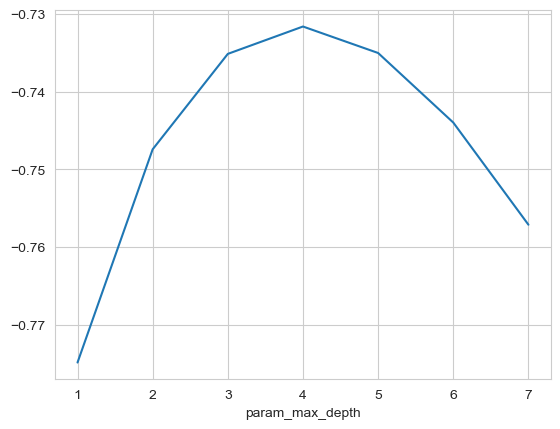

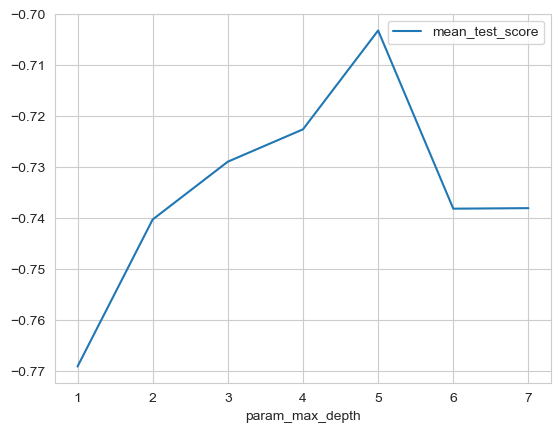

In [11]:
DT_results.groupby('param_max_depth')['mean_test_score'].mean().plot()
DT_depth = DT_results[(DT_results.param_max_features == 19) & (DT_results.param_min_samples_split == 35) & (DT_results.param_min_samples_leaf == 23)][['param_max_depth', 'mean_train_score', 'mean_test_score']].plot('param_max_depth', 'mean_test_score')

<Axes: xlabel='param_max_features'>

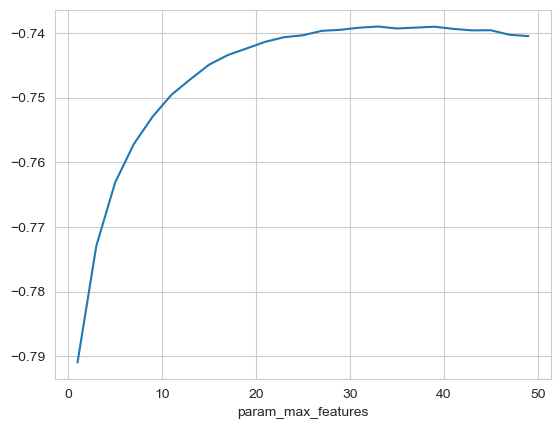

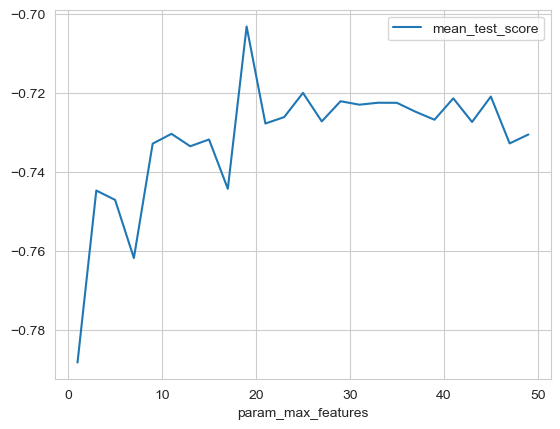

In [12]:
DT_results.groupby('param_max_features')['mean_test_score'].mean().plot()
DT_results[(DT_results.param_max_depth == 5) & (DT_results.param_min_samples_split == 35) & (DT_results.param_min_samples_leaf == 23)][['param_max_features', 'mean_train_score', 'mean_test_score']].plot('param_max_features', 'mean_test_score')

<Axes: xlabel='param_min_samples_split'>

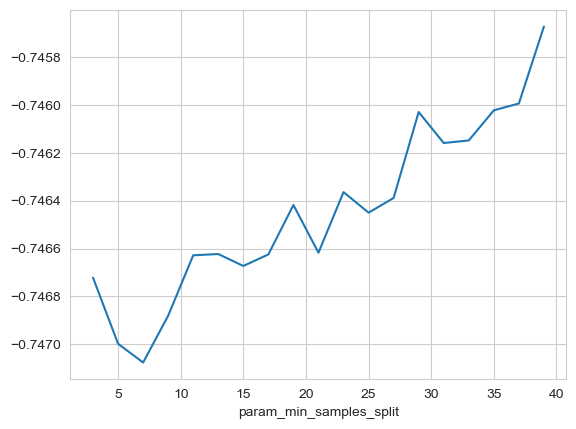

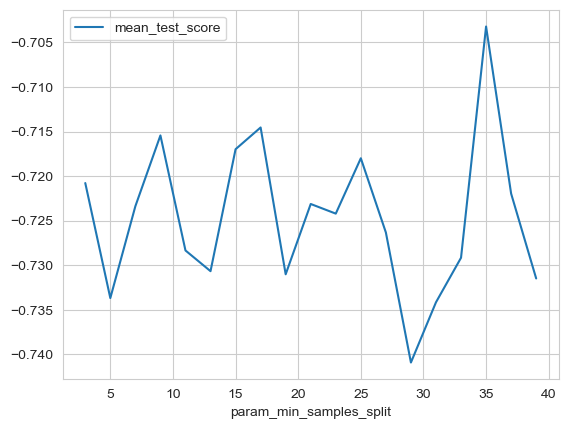

In [13]:
DT_results.groupby('param_min_samples_split')['mean_test_score'].mean().plot()
DT_results[(DT_results.param_max_features == 19) & (DT_results.param_max_depth == 5) & (DT_results.param_min_samples_leaf == 23)][['param_min_samples_split', 'mean_train_score', 'mean_test_score']].plot('param_min_samples_split', 'mean_test_score')

<Axes: xlabel='param_min_samples_leaf'>

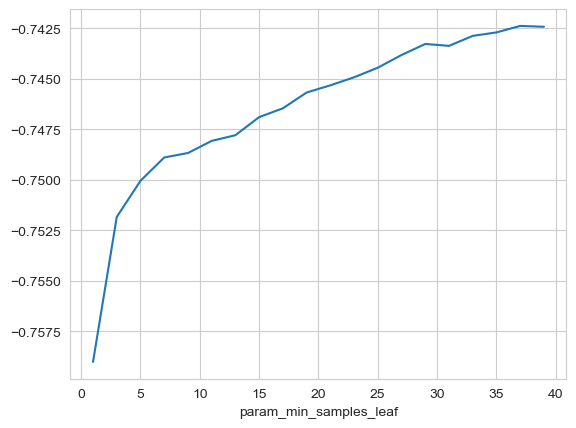

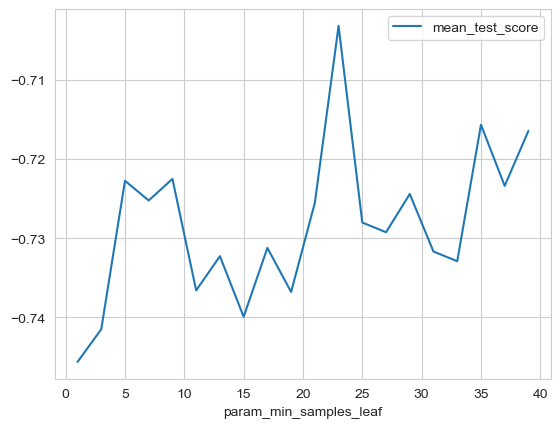

In [14]:
DT_results.groupby('param_min_samples_leaf')['mean_test_score'].mean().plot()
DT_results[(DT_results.param_max_features == 19) & (DT_results.param_min_samples_split == 35) & (DT_results.param_max_depth == 5)][['param_min_samples_leaf', 'mean_train_score', 'mean_test_score']].plot('param_min_samples_leaf', 'mean_test_score')

In [15]:
model = DecisionTreeRegressor(**best_params)
model.fit(X_train, y_train)
mean_squared_error(model.predict(X_test), y_test)

0.648545604313787

[Text(0.553125, 0.9166666666666666, 'x[24] <= 4332.836\nsquared_error = 0.8\nsamples = 3349\nvalue = 7.431'),
 Text(0.35, 0.75, 'x[0] <= 78.5\nsquared_error = 0.591\nsamples = 1774\nvalue = 7.206'),
 Text(0.2, 0.5833333333333334, 'x[27] <= 1750.0\nsquared_error = 0.52\nsamples = 1617\nvalue = 7.137'),
 Text(0.1, 0.4166666666666667, 'x[16] <= 0.5\nsquared_error = 0.517\nsamples = 704\nvalue = 6.973'),
 Text(0.05, 0.25, 'x[46] <= 0.699\nsquared_error = 0.522\nsamples = 655\nvalue = 6.945'),
 Text(0.025, 0.08333333333333333, 'squared_error = 0.464\nsamples = 401\nvalue = 6.871'),
 Text(0.075, 0.08333333333333333, 'squared_error = 0.59\nsamples = 254\nvalue = 7.063'),
 Text(0.15, 0.25, 'x[26] <= 946.5\nsquared_error = 0.302\nsamples = 49\nvalue = 7.346'),
 Text(0.125, 0.08333333333333333, 'squared_error = 0.202\nsamples = 26\nvalue = 7.14'),
 Text(0.175, 0.08333333333333333, 'squared_error = 0.313\nsamples = 23\nvalue = 7.58'),
 Text(0.3, 0.4166666666666667, 'x[16] <= 0.5\nsquared_error = 

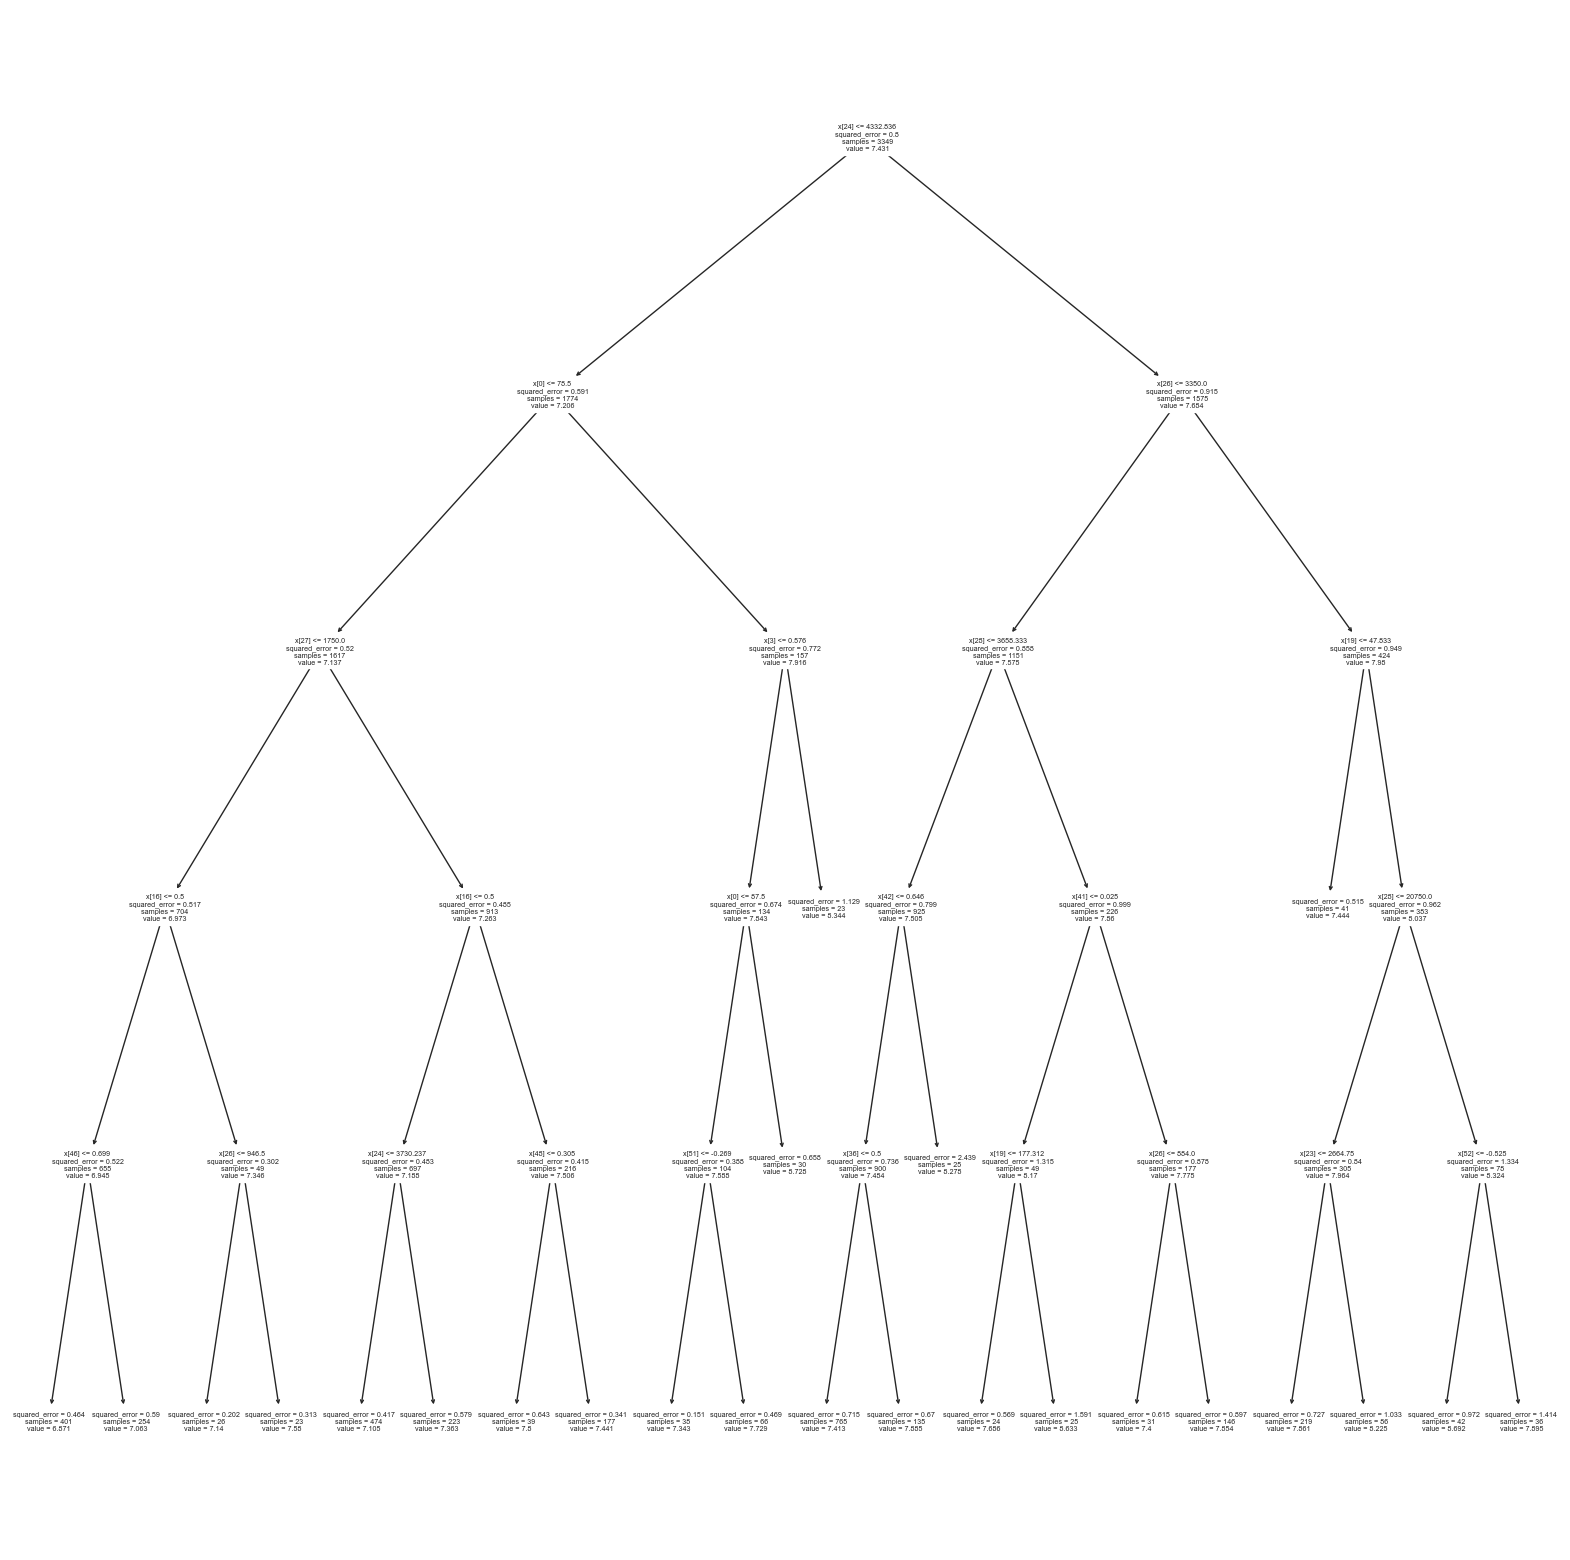

In [16]:
plt.figure(figsize=(20, 20))
plot_tree(model)

#### Feature importance

<Axes: ylabel='feature'>

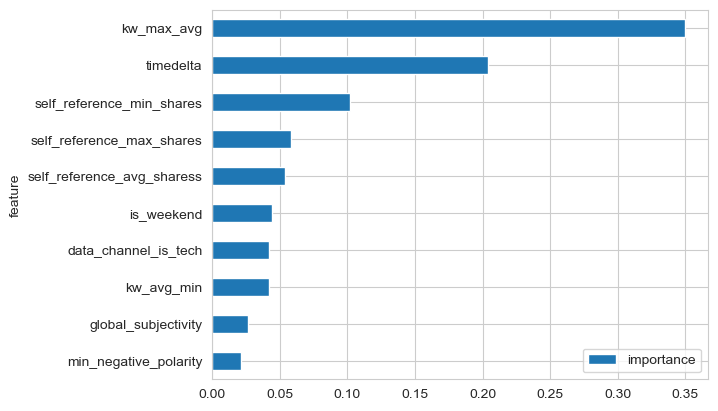

In [17]:
importances = pd.DataFrame({'importance': model.feature_importances_, 'feature': X.columns})
importances.sort_values('importance').iloc[-10:].plot('feature', 'importance', kind='barh')

Most important features are time since article was posted and self_reference_min_shares

## Random Forest


#### Basic random forest

In [18]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
mean_squared_error(model.predict(X_test), y_test)

0.5758440086677646

#### Optimizing RF parameters

In [19]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1, 300),
        'max_depth': trial.suggest_int('max_depth', 1, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 40),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 40),
        'max_features': trial.suggest_int('max_features', 1, 40)
    }

    return cross_val_score(RandomForestRegressor(**params, n_jobs=-1), X, y_log, cv=4, scoring='neg_mean_squared_error').mean()

In [29]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, 10000, n_jobs=12)

[I 2023-10-26 17:46:34,347] A new study created in memory with name: no-name-db29088e-4930-49e0-b900-68295f1b2f4c
[I 2023-10-26 17:46:35,375] Trial 0 finished with value: -0.7060669823309275 and parameters: {'n_estimators': 289, 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 37, 'max_features': 2}. Best is trial 0 with value: -0.7060669823309275.
[I 2023-10-26 17:46:35,931] Trial 1 finished with value: -0.679319386632528 and parameters: {'n_estimators': 38, 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 36}. Best is trial 1 with value: -0.679319386632528.
[I 2023-10-26 17:46:37,900] Trial 2 finished with value: -0.6776938054083133 and parameters: {'n_estimators': 267, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 36, 'max_features': 33}. Best is trial 2 with value: -0.6776938054083133.
[I 2023-10-26 17:46:38,186] Trial 3 finished with value: -0.7002971216203899 and parameters: {'n_estimators': 30, 'max_depth': 3, 'min_samples

In [20]:
# study.best_params

In [21]:
# RF_results = study.trials_dataframe()
# RF_results = RF_results[['params_n_estimators', 'params_max_depth', 'params_max_features', 'params_min_samples_leaf', 'params_min_samples_split', 'value']]
# RF_results.to_csv('RF_results.csv', index=0)

In [22]:
RF_results = pd.read_csv('RF_results.csv')
RF_results.head()

,params_n_estimators,params_max_depth,params_max_features,params_min_samples_leaf,params_min_samples_split,value
0,289,9,2,37,19,-0.706067
1,38,8,36,1,14,-0.679319
2,267,8,33,36,2,-0.677694
3,30,3,29,38,11,-0.700297
4,54,5,29,16,7,-0.685820


In [23]:
best_params = {
    'n_estimators': 287,
    'max_depth': 25,
    'min_samples_split': 6,
    'min_samples_leaf': 1,
    'max_features': 8
}

<Axes: xlabel='params_n_estimators'>

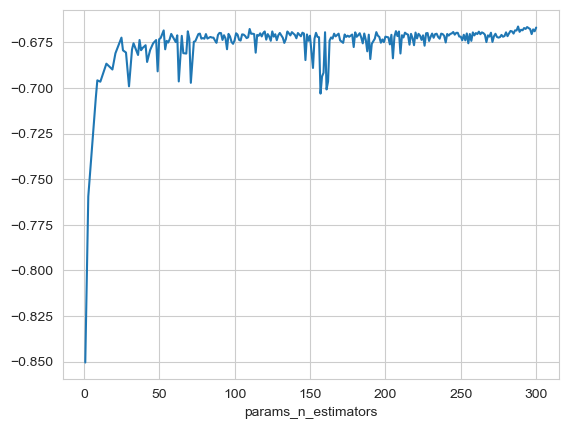

In [24]:
RF_results.groupby('params_n_estimators')['value'].mean().plot()

<Axes: xlabel='params_max_depth'>

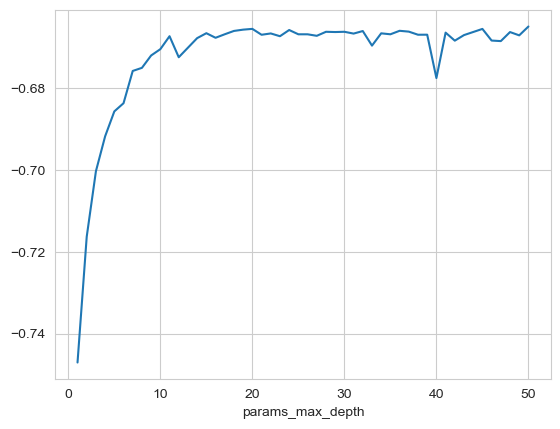

In [25]:
RF_results.groupby('params_max_depth')['value'].mean().plot()

<Axes: xlabel='params_max_features'>

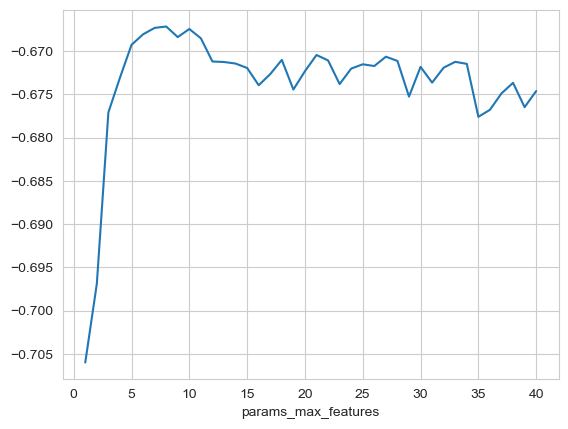

In [26]:
RF_results.groupby('params_max_features')['value'].mean().plot()

<Axes: xlabel='params_min_samples_split'>

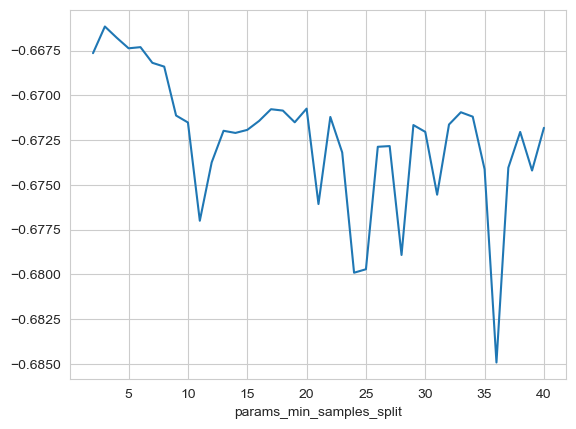

In [27]:
RF_results.groupby('params_min_samples_split')['value'].mean().plot()

<Axes: xlabel='params_min_samples_leaf'>

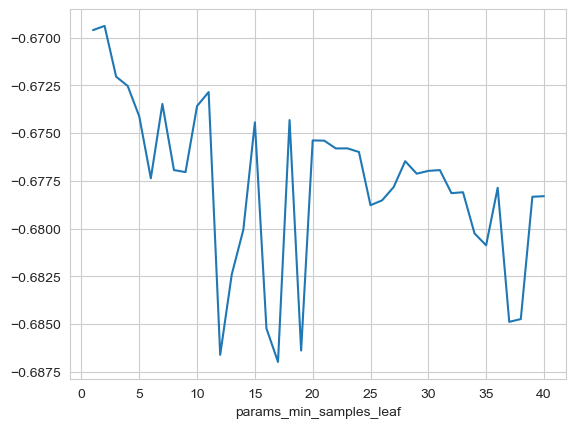

In [28]:
RF_results.groupby('params_min_samples_leaf')['value'].mean().plot()

In [29]:
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)
mean_squared_error(model.predict(X_test), y_test)

0.5649748834393722

#### Feature importance

<Axes: ylabel='feature'>

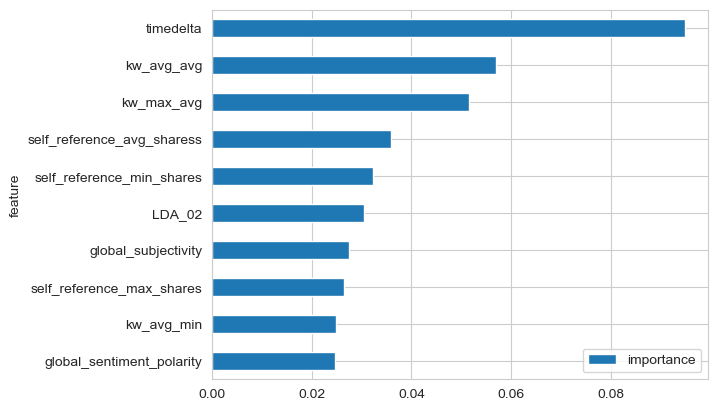

In [30]:
importances = pd.DataFrame({'importance': model.feature_importances_, 'feature': X.columns})
importances.sort_values('importance').iloc[-10:].plot('feature', 'importance', kind='barh')

### Results
Single Decision tree MSE: 0.648
Random forest MSE: 0.565
Random forest performs better